# Ordinary Differential Equations Exercise 1

## Imports

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
from IPython.html.widgets import interact, fixed

## Euler's method

[Euler's method](http://en.wikipedia.org/wiki/Euler_method) is the simplest numerical approach for solving a first order ODE numerically. Given the differential equation

$$ \frac{dy}{dx} = f(y(x), x) $$

with the initial condition:

$$ y(x_0)=y_0 $$

Euler's method performs updates using the equations:

$$ y_{n+1} = y_n + h f(y_n,x_n) $$

$$ h = x_{n+1} - x_n $$

Write a function `solve_euler` that implements the Euler method for a 1d ODE and follows the specification described in the docstring:

In [146]:
def solve_euler(derivs, y0, x):
    """Solve a 1d ODE using Euler's method.
    
    Parameters
    ----------
    derivs : function
        The derivative of the diff-eq with the signature deriv(y,x) where
        y and x are floats.
    y0 : float
        The initial condition y[0] = y(x[0]).
    x : np.ndarray, list, tuple
        The array of times at which of solve the diff-eq.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions y[i] = y(x[i])
    """

    h = x[1]-x[0]
    ytemp = np.zeros_like(x)
    ytemp[0] = 0
    for i in range(len(x)-1):
        ytemp[i+1] = ytemp[i] + h*derivs(ytemp[i],x[i])
    return ytemp


In [147]:
assert np.allclose(solve_euler(lambda y, x: 1, 0, [0,1,2]), [0,1,2])

The [midpoint method]() is another numerical method for solving the above differential equation. In general it is more accurate than the Euler method. It uses the update equation:

$$ y_{n+1} = y_n + h f\left(y_n+\frac{h}{2}f(y_n,x_n),x_n+\frac{h}{2}\right) $$

Write a function `solve_midpoint` that implements the midpoint method for a 1d ODE and follows the specification described in the docstring:

In [148]:
def solve_midpoint(derivs, y0, x):
    """Solve a 1d ODE using the Midpoint method.
    
    Parameters
    ----------
    derivs : function
        The derivative of the diff-eq with the signature deriv(y,x) where y
        and x are floats.
    y0 : float
        The initial condition y[0] = y(x[0]).
    x : np.ndarray, list, tuple
        The array of times at which of solve the diff-eq.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions y[i] = y(x[i])
    """
    h = x[1]-x[0]
    ytemp = np.zeros_like(x)
    ytemp[0] = 0
    for i in range(len(x)-1):
        ytemp[i+1] = ytemp[i] + h*derivs(ytemp[i] + (h/2)*derivs(ytemp[i],x[i]),x[i]+h/2)
    return ytemp

In [149]:
assert np.allclose(solve_euler(lambda y, x: 1, 0, [0,1,2]), [0,1,2])

You are now going to solve the following differential equation:

$$
\frac{dy}{dx} = x + 2y
$$

which has the analytical solution:

$$
y(x) = 0.25 e^{2x} - 0.5 x - 0.25
$$

First, write a `solve_exact` function that compute the exact solution and follows the specification described in the docstring:

In [150]:
def solve_exact(x):
    """compute the exact solution to dy/dx = x + 2y.
    
    Parameters
    ----------
    x : np.ndarray
        Array of x values to compute the solution at.
    
    Returns
    -------
    y : np.ndarray
        Array of solutions at y[i] = y(x[i]).
    """

    ytemp = np.zeros_like(x)
    y = 0.25*np.exp(2*x)-0.5*x-0.25
    return y

In [151]:
assert np.allclose(solve_exact(np.array([0,1,2])),np.array([0., 1.09726402, 12.39953751]))

In the following cell you are going to solve the above ODE using four different algorithms:

1. Euler's method
2. Midpoint method
3. `odeint`
4. Exact

Here are the details:

* Generate an array of x values with $N=11$ points over the interval $[0,1]$ ($h=0.1$).
* Define the `derivs` function for the above differential equation.
* Using the `solve_euler`, `solve_midpoint`, `odeint` and `solve_exact` functions to compute
  the solutions using the 4 approaches.

Visualize the solutions on a sigle figure with two subplots:

1. Plot the $y(x)$ versus $x$ for each of the 4 approaches.
2. Plot $\left|y(x)-y_{exact}(x)\right|$ versus $x$ for each of the 3 numerical approaches.

Your visualization should have legends, labeled axes, titles and be customized for beauty and effectiveness.

While your final plot will use $N=10$ points, first try making $N$ larger and smaller to see how that affects the errors of the different approaches.

In [152]:
x = np.linspace(0,1,11)
def derivs(y,x):
    dy = x + 2*y
    return np.array(dy)

In [153]:
euler = solve_euler(derivs,0,x)
midpoint = solve_midpoint(derivs,0,x)
exact = solve_exact(x)
odeint = odeint(derivs,0,x)
odein = []
[odein.extend(i) for i in odeint]
odein

[0.0,
 0.0053506854567806983,
 0.022956178135871363,
 0.05552970204648601,
 0.10638524546117034,
 0.17957049029368929,
 0.28002928139336314,
 0.41380005569768746,
 0.58825818950278164,
 0.81241197670093224,
 1.0972641554450806]

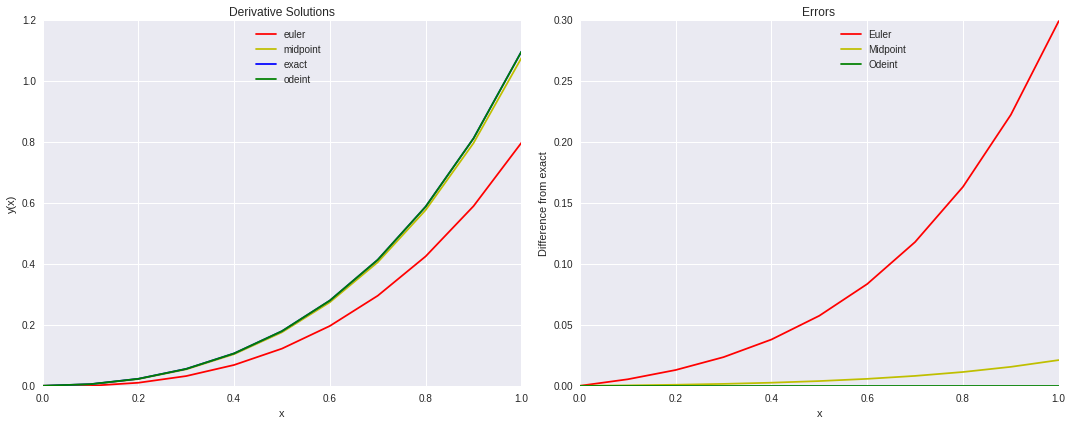

In [161]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.title("Derivative Solutions")
plt.ylabel("y(x)")
plt.xlabel("x")
plt.plot(x,euler,'r',label = 'euler')
plt.plot(x,midpoint,'y',label = 'midpoint')
plt.plot(x,exact,'b',label = 'exact')
plt.plot(x,odeint,'g',label = 'odeint')
plt.legend(bbox_to_anchor = (0.6,1.0))

plt.subplot(1,2,2)
plt.title("Errors")
plt.ylabel("Difference from exact")
plt.xlabel("x")
plt.plot(x,abs(euler - exact),'r',label = "Euler")
plt.plot(x,abs(midpoint - exact),'y',label = "Midpoint")
plt.plot(x,abs(odein - exact),'g',label = "Odeint")
plt.legend(bbox_to_anchor=(0.7,1.0))

plt.tight_layout();

In [155]:
assert True